In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

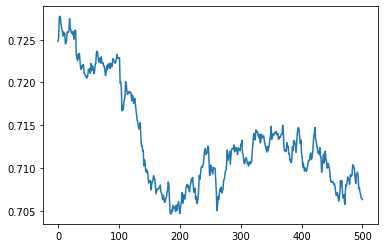

In [10]:
with open('data/data2/AUD_USD-1588780800-H1-10000.json') as f:
    data = json.load(f)
d = {r: [dic[r] for dic in data] for r in data[0]}
df = pd.DataFrame(d)
diff = list(df['O'].diff()[1:])
diff.append(np.nan)
# Label used for feature selection is when V_t=1 - V_t=0 > 0
df['d_O'] = diff
df['d_O_sign'] = df['d_O'] > 0
df_dev = df.loc[:500]
plt.plot(df_dev['O'])
plt.show()

In [11]:
class MACD:
    def __init__(self, capital):
        self.capital = capital
        self.hist = pd.DataFrame()

    def act(self, observation):
        """Given an observation, return an action.
        Input:
            observation - ndarray, shape=(1, d)
        Output:
            action - int, [-1, 0, 1] for sell, nothing, buy respectively
        """
        self.hist = self.hist.append(pd.Series(observation), ignore_index=True)
        self.hist['ema26'] = self.hist[0].ewm(span=26,
                                              min_periods=26,
                                              adjust=False).mean()
        self.hist['ema12'] = self.hist[0].ewm(span=12,
                                              min_periods=12,
                                              adjust=False).mean()
        self.hist['macd'] = self.hist['ema26'] - self.hist['ema12']
        self.hist['macd_signal'] = self.hist['macd'].ewm(span=9,
                                                         min_periods=9,
                                                         adjust=False).mean()
        self.hist['diff'] = self.hist['macd'] - self.hist['macd_signal']
        self.hist['diff_lag'] = self.hist['diff'].shift(1)
        
        # action: 1 means buy, -1 means sell, 0 means do nothing
        self.hist['action'] = (np.sign(self.hist['diff']) - np.sign(self.hist['diff_lag'])) / 2
        self.hist['balance_change'] = -1 * self.hist['action'] * self.hist[0]
        self.hist['stock'] = self.hist['action'].cumsum()
        self.hist['balance'] = self.capital + self.hist['balance_change'].cumsum()
        
    def plot(self):
        fig, ax1 = plt.subplots()
        
        plt.title("Signals")
        ax1.plot(self.hist['macd'], label='macd')
        ax1.plot(self.hist['macd_signal'], label='macd_signal')
        ax1.set_ylabel("signals")
        plt.legend(loc='best')
        
        ax2 = ax1.twinx()
        ax2.plot(self.hist[0], 'r', label='price')
        ax2.set_ylabel("price")
        plt.show()
        
        plt.title("Balance")
        plt.plot(self.hist['balance'], '.', label='balance')
        plt.legend(loc='best')
        plt.show()
    
    def __repr__(self):
        return str(self.hist.iloc[-1])
    
    def run(self, X):
        for i, v in enumerate(X):
            self.act(v)

In [12]:
macd = MACD(capital=100)
for v in df['O'][:100]:
    macd.act(v)
# macd.act(df['O'][0])

C:\Users\notes\Anaconda3\envs\quant\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
macd.hist

,0,ema26,ema12,macd,macd_signal,diff,diff_lag,action,balance_change,stock,balance
0,0.72482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.72524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.72760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.72774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.72748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,0.72246,0.722182,0.722271,-0.000089,-0.000026,-0.000063,-0.000067,0.0,-0.0,-1.0,100.72188
96,0.72278,0.722226,0.722349,-0.000123,-0.000045,-0.000078,-0.000063,0.0,-0.0,-1.0,100.72188
97,0.72326,0.722303,0.722489,-0.000187,-0.000073,-0.000113,-0.000078,0.0,-0.0,-1.0,100.72188
98,0.72286,0.722344,0.722546,-0.000202,-0.000099,-0.000103,-0.000113,0.0,-0.0,-1.0,100.72188


C:\Users\notes\Anaconda3\envs\quant\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


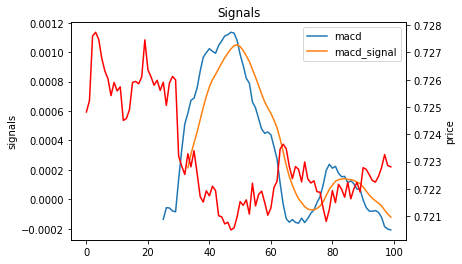

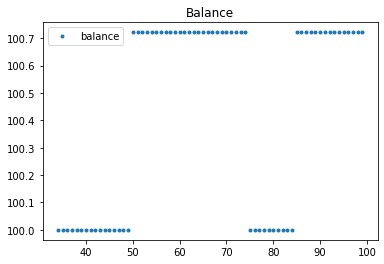

0                   0.722810
ema26               0.722378
ema12               0.722587
macd               -0.000208
macd_signal        -0.000121
diff               -0.000087
diff_lag           -0.000103
action              0.000000
balance_change     -0.000000
stock              -1.000000
balance           100.721880
Name: 99, dtype: float64

In [14]:
macd = MACD(capital=100)
macd.run(df['O'][:100])
macd.plot()
macd

In [7]:
macd.hist['balance']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
195    100.00152
196    100.00152
197    100.00152
198    100.00152
199    100.00152
Name: balance, Length: 200, dtype: float64

In [8]:
class RSI:
    def __init__(self, capital):
        self.capital = capital
        self.hist = pd.DataFrame()
    def act(self, observation):
        self.hist = self.hist.append(pd.Series(observation), ignore_index=True)
        
        dUp, dDown = 
            
#         # action: 1 means buy, -1 means sell, 0 means do nothing
#         self.hist['action'] = (np.sign(self.hist['diff']) - np.sign(self.hist['diff_lag'])) / 2
#         self.hist['balance_change'] = -1 * self.hist['action'] * self.hist[0]
        
#         self.hist['stock'] = self.hist['action'].cumsum()
#         self.hist['balance'] = self.capital + self.hist['balance_change'].cumsum()
        
    def __repr__(self):
        return str(self.hist.iloc[-1])

SyntaxError: invalid syntax (<ipython-input-8-d9c09bcadfaf>, line 8)

In [446]:
rsi = RSI(0)
for i, v in enumerate(df[['O', 'C']].values[:4]):
    rsi.act(v)
rsi.hist

,0,1,diff,gain,loss,cum_gain,cum_loss,num_gain,num_loss
0,0.72482,0.72518,0.000497,0.000497,0.000000,0.000497,0.000000,1.0,-0.0
1,0.72524,0.72758,0.003227,0.003227,0.000000,0.003723,0.000000,2.0,-0.0
2,0.72760,0.72772,0.000165,0.000165,0.000000,0.003888,0.000000,3.0,-0.0
3,0.72774,0.72748,-0.000357,0.000000,-0.000357,0.003888,-0.000357,3.0,1.0
